# <center> <font color= #000047> Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



### Act 1: Cargar datasets y librerias 
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Act 2: Visualizar los datos
---

Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

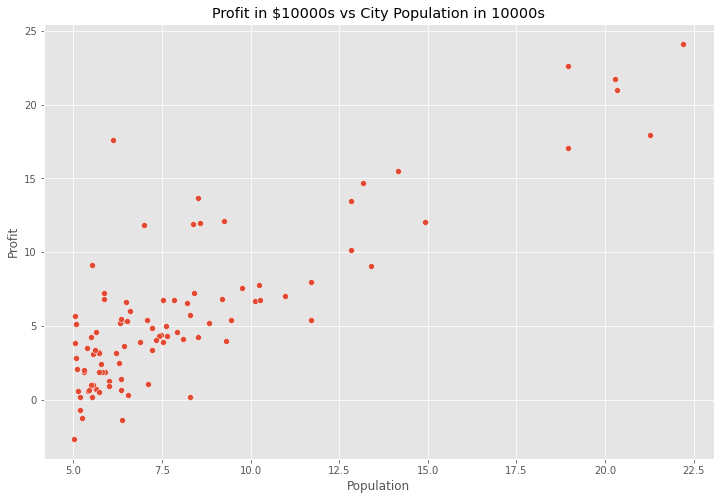

In [5]:
ax = sns.scatterplot(x='Population', y ='Profit', data = data)
ax.set_title('Profit in $10000s vs City Population in 10000s')

### Act 3: Calcular la función de costo $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [7]:
m = data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y =  data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

### Act 4: Gradiante Descediente
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1 / m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print('h(x) = {} + {}x1'.format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


### Act 5: Visualizando la función de costo $J(\theta)$
---

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

/tmp/ipykernel_332/4022374182.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')
/tmp/ipykernel_332/4022374182.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect = 5)


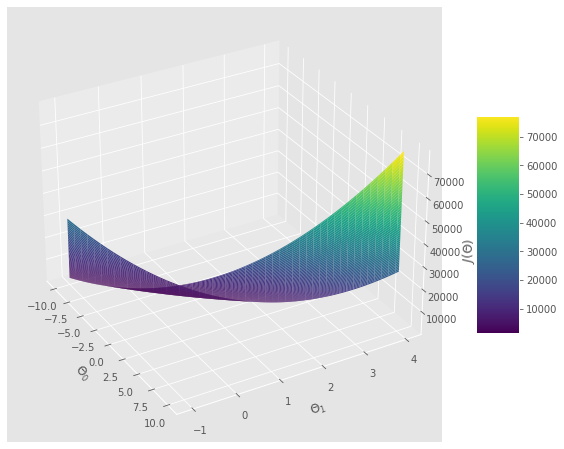

In [12]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect = 5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)

plt.show()

### Act 6: Grafica la convergencia
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

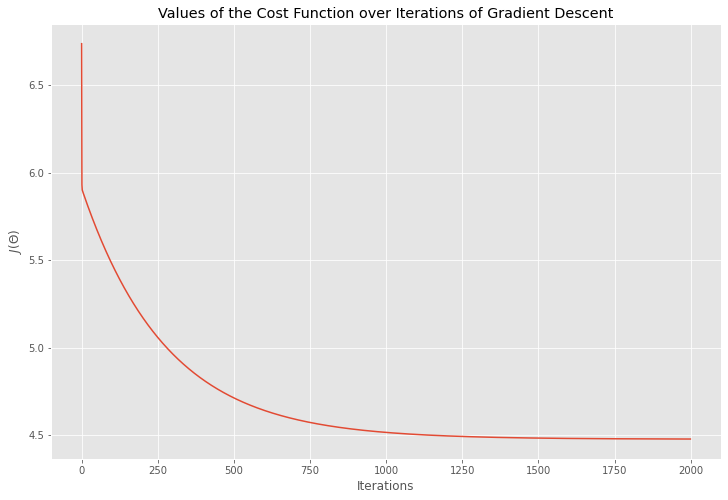

In [13]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost Function over Iterations of Gradient Descent')

### TasActk 7: Datos de entrenamiento con ajuste de regresión lineal
---

In [14]:
theta.shape

(2, 1)

In [15]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/mnt/c/Users/betof/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Repositorios/prope_programacion/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

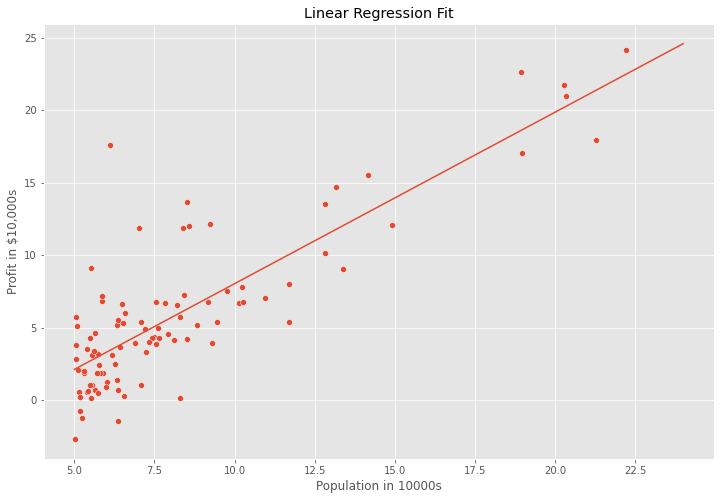

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y ='Profit', data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')




### Act 8: Conclusiones usando los valores optimizados de $\theta$
---

$h_\theta(x) = \theta^Tx$

In [17]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [18]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print('For a population of 40,000, the model predicts a profit of $' + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $9408.0


In [19]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print('For a population of 83,000, the model predicts a profit of $' + str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $60243.0


## Ejemplo usando la librería de Sklearn

### Ejemplo 1:

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [22]:
# Identificar las variables independientes, dependientes
x = data['Population'].values.reshape(-1,1)
y = data['Profit'].values.reshape(-1,1)

In [23]:
# y_hat = b1*x + b0
# Aplicar un modelo lineal con la librería
modelo = LinearRegression()
#Entrenar al modelo lineal
modelo.fit(x,y)
#Predecir datos en x
y_pred = modelo.predict(x)

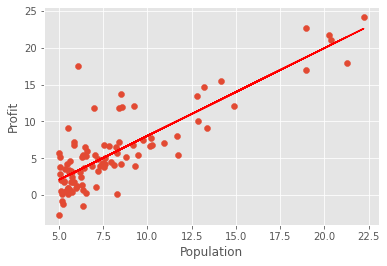

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(data['Population'], data['Profit'])
plt.plot(x, y_pred, '-r')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [25]:
# coeficientes que acompañan a la variable independiente "x" beta_1,..,beta_n
modelo.coef_

array([[1.19303364]])

In [26]:
# coeficientes de intercepción al eje de las abcisas beta_0
modelo.intercept_

array([-3.89578088])

##### Modelo Obtenido

$$\hat{y} = 1.193  x - 3.895$$

### Ejemplo 2:

In [27]:
datos = pd.read_csv('Data/Position_Salaries.csv')

In [28]:
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [29]:
datos['Level'].values.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [30]:
# identificar las variables independientes,dependientes
x=datos['Level'].values.reshape(-1,1)
y=datos['Salary'].values.reshape(-1,1)

Text(0, 0.5, 'Salary')

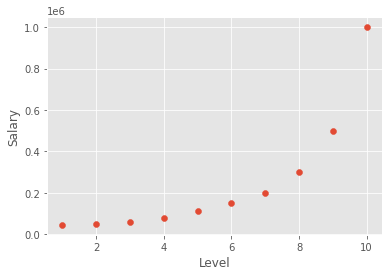

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salary')

Error cuadrático Medio: 26695878787.878784
R2_score: 0.5053238120653423


(array([[80878.78787879]]), array([-195333.33333333]))

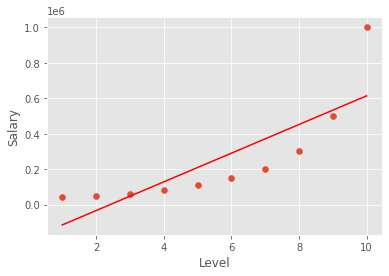

In [32]:
# Buscar un modelo lineal que se ajuste a los datos

# 1.- Entrenar un modelo lineal con la librería y_hat=b1*x + bo
modelo = LinearRegression()
modelo.fit(x,y)
# 2.- Predecir los valores de x
y_pred = modelo.predict(x)
# 3.- Grafiquen su modelo con los datos originales
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')
# 4.- mean_squared_error(y_pred,y), r2_score(y_pred,y) 
print('Error cuadrático Medio: '+str(mean_squared_error(y_pred,y)))
print('R2_score: '+str(r2_score(y_pred,y)))
modelo.coef_, modelo.intercept_

In [33]:
!python -m pip install drawdata
!python -m pip install pingouin

In [34]:
from drawdata import draw_scatter

draw_scatter()

In [35]:
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import pingouin as pg

mpl.style.use('bmh')  

In [36]:
import pandas as pd
pd.set_option('display.max_rows', 10) 
import numpy as np
df = pd.read_csv("draw_data.csv")
df.head()

,x,y,z
0,37.848609,84.419856,a
1,65.386019,47.059546,a
2,80.554402,72.065892,a
3,126.600849,89.857784,a
4,51.444935,89.808401,a


In [37]:
tipo = 'a'
datos = df[(df.z==tipo)]
datos

,x,y,z
0,37.848609,84.419856,a
1,65.386019,47.059546,a
2,80.554402,72.065892,a
3,126.600849,89.857784,a
4,51.444935,89.808401,a
...,...,...,...
195,633.640965,108.241593,a
196,587.139855,125.353995,a
197,630.018146,121.667296,a
198,615.753473,35.223870,a


In [38]:
datos.x

0       37.848609
1       65.386019
2       80.554402
3      126.600849
4       51.444935
          ...    
195    633.640965
196    587.139855
197    630.018146
198    615.753473
199    625.911985
Name: x, Length: 200, dtype: float64

In [39]:
x = np.array(datos.x).reshape(-1, 1)
x

array([[ 37.848609  ],
       [ 65.38601888],
       [ 80.55440165],
       [126.60084867],
       [ 51.44493451],
       [ 53.00253495],
       [ 80.80652437],
       [ 65.50343418],
       [109.75114567],
       [110.91330887],
       [133.15841639],
       [178.5259807 ],
       [180.80988091],
       [159.88707298],
       [177.32659721],
       [209.59369257],
       [145.84513716],
       [171.72241608],
       [162.38035412],
       [231.38163545],
       [231.26441664],
       [243.59119766],
       [253.41446121],
       [247.39248705],
       [303.63922234],
       [302.18988391],
       [352.72515759],
       [303.77372163],
       [383.06984135],
       [420.94872454],
       [389.49509201],
       [415.58796739],
       [432.77291064],
       [455.96104305],
       [494.68673706],
       [541.8090483 ],
       [515.52558757],
       [558.45554517],
       [538.37240156],
       [539.61217731],
       [556.7211561 ],
       [560.35085115],
       [550.04557181],
       [568

In [40]:
y = np.array(datos.y).reshape(-1, 1)

Error cuadrático Medio: 10834.827391035362
R2_score: -220.65553714005893


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,236.945306,16.862793,14.051368,1.447116e-31,0.004491,-0.000537,203.691583,270.199028
1,x,0.038694,0.040940,0.945134,3.457425e-01,0.004491,-0.000537,-0.042041,0.119428


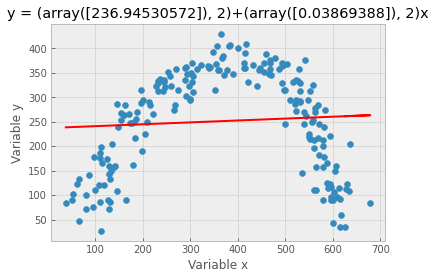

In [41]:
# 1.- Entrenar un modelo lineal con la librería y_hat=b1*x + bo
modelo = LinearRegression()
modelo.fit(x,y)
# 2.- Predecir los valores d
y_pred = modelo.predict(x)
# 3.- Grafiquen su modelo con los datos originales
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Variable x')
plt.ylabel('Variable y')
titulo = "y = " + str((modelo.intercept_,2)) + "+" + str((modelo.coef_[0],2)) + "x"
plt.title(titulo)
# 4.- mean_squared_error(y_pred,y), r2_score(y_pred,y) 
print('Error cuadrático Medio: '+str(mean_squared_error(y_pred,y)))
print('R2_score: '+str(r2_score(y_pred,y)))
modelo.coef_, modelo.intercept_

#Test
pg.linear_regression(datos.x, datos.y)